In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_terpi_lsa.csv")

In [3]:
df_rf

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Terpinolene
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42965,0.360708,-0.269375,0.169135,0.099257,0.141142,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
74996,42965,0.360708,-0.269375,0.169135,0.099257,0.141142,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
74997,42970,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
74998,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [4]:
df_rf.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_rf.drop(['index', 'X..Terpinolene'], axis = 1)
y = df_rf[['X..Terpinolene']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

<Axes: ylabel='Count'>

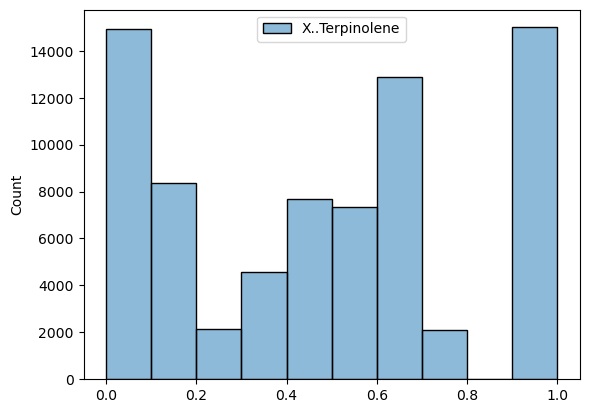

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
rfreg = RandomForestRegressor(n_jobs = -1)
rfreg.fit(X_train1, y_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_3115/119766249.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor(n_jobs=-1)

In [11]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [12]:
mean_absolute_error(y_val, y_pred_rfreg)

0.02609556502129611

In [13]:
mean_squared_error(y_val, y_pred_rfreg)

0.005374055666325936

In [14]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.07330795090797407

In [15]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9911986590242406

In [16]:
#val
r2_score(y_val, y_pred_rfreg)

0.9548311054087357

Residual plots for each target variable

Feature Selection

In [17]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [18]:
df_feat

,features,score
0,lsa_0,0.106973
1,lsa_1,0.087173
2,lsa_2,0.093273
3,lsa_3,0.088205
4,lsa_4,0.083034
...,...,...
81,tree,0.000678
82,tropical,0.001079
83,vanilla,0.039971
84,violet,0.000033


In [19]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [20]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
45,cheese,1.121512e-01
0,lsa_0,1.069729e-01
2,lsa_2,9.327275e-02
3,lsa_3,8.820521e-02
1,lsa_1,8.717294e-02
4,lsa_4,8.303432e-02
6,indica,7.956255e-02
83,vanilla,3.997128e-02
5,hybrid,2.578771e-02
7,sativa,2.517714e-02


In [21]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [22]:
selector.estimator_.feature_importances_

array([1.10394301e-01, 8.86083686e-02, 8.91167661e-02, 8.83819875e-02,
       8.06312466e-02, 2.24395268e-02, 8.04479628e-02, 2.63967457e-02,
       2.12679933e-04, 2.23939562e-03, 3.21214679e-03, 1.30099432e-10,
       4.59313206e-03, 2.33287962e-04, 8.05011716e-03, 1.34411792e-02,
       4.77939238e-03, 7.76206687e-03, 4.50484870e-10, 6.94874092e-03,
       4.73015955e-09, 1.59625250e-08, 6.12258445e-03, 1.05581717e-02,
       1.13960864e-02, 1.88661868e-03, 4.52760510e-03, 1.96818311e-04,
       1.41138813e-10, 2.20220812e-03, 1.40329311e-02, 1.61192950e-07,
       7.65877348e-03, 9.59646918e-06, 0.00000000e+00, 5.70257786e-03,
       3.81224058e-03, 7.39739517e-03, 3.38291318e-04, 1.13947352e-04,
       7.08002333e-04, 1.80655714e-02, 1.60341890e-04, 8.06046537e-03,
       1.93956950e-04, 1.10628156e-01, 6.34127553e-04, 2.19916969e-03,
       3.73942108e-03, 9.91232421e-04, 1.97297688e-02, 6.72472366e-03,
       1.65432449e-03, 8.17431588e-04, 2.05410846e-03, 2.29200726e-04,
      

In [23]:
selector.threshold_

0.011627906976744186

In [24]:
mask = selector.get_support()

In [25]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False])

In [26]:
selected_features = X.columns[mask]

In [27]:
selected_X = df_rf[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,dry eyes,relaxed,berry,cheese,diesel,lemon,orange,vanilla
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,1,0,0,0,0,0,0
1,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,1,0,0,0,0,0,0
2,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,1,0,0,0,0,0,0
3,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,1,0,0,0,0,0,0
4,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.360708,-0.269375,0.169135,0.099257,0.141142,0,1,0,0,0,0,0,0,0,0,0
74996,0.360708,-0.269375,0.169135,0.099257,0.141142,0,1,0,0,0,0,0,0,0,0,0
74997,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,0,0,0,0,0,0,0
74998,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,1,0,0,0,0,0,0


Train test split (after Feature Selection)

In [28]:
import joblib

joblib.dump(selector, "selector_rf_lsa_elbow_terpi.pkl")
joblib.dump(selected_X, "selected_X_rf_lsa_elbow_terpi.pkl")

['selected_X_rf_lsa_elbow_terpi.pkl']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [30]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [31]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_3115/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [32]:
mean_absolute_error(y_val, y_pred_rfreg)

0.0291428444691492

In [33]:
mean_squared_error(y_val, y_pred_rfreg)

0.006295439082046535

In [34]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.07934380304753821

In [35]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9850410421257032

In [36]:
#val
r2_score(y_val, y_pred_rfreg)

0.9468842937663522

Hyperparameter Tuning

In [37]:
parameters = { 'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [38]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs= -1)

In [39]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/li

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [40]:
rscv.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100}

In [41]:
joblib.dump(rscv, "rscv_rf_lsa_elbow_terpi.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_lsa_elbow_best_params_terpi.pkl")

['rscv_rf_lsa_elbow_best_params_terpi.pkl']

RF (after Hyperparameter Tuning)

In [42]:
rfreg_ht = RandomForestRegressor(n_estimators = 500, min_samples_split = 2, max_features = 'auto', min_samples_leaf = 1, max_depth = 100)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_3115/1305773741.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [43]:
mean_absolute_error(y_val, y_pred_rfreg)

0.02902627761950741

In [44]:
mean_squared_error(y_val, y_pred_rfreg)

0.006197405779971466

In [45]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.07872360370290137

In [46]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9853248351308462

In [47]:
#val
r2_score(y_val, y_pred_rfreg)

0.9477114176581525

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [48]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [49]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_lsa_elbow_terpi.pkl")
joblib.dump(y_test, "y_test_rfreg_lsa_elbow_terpi.pkl")

['y_test_rfreg_lsa_elbow_terpi.pkl']

In [50]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.028756780634441634

In [51]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.006172697125753045

In [52]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.07856651402317048

In [53]:
r2_score(y_test, y_pred_rfreg_test)

0.948413092961397

Error analysis

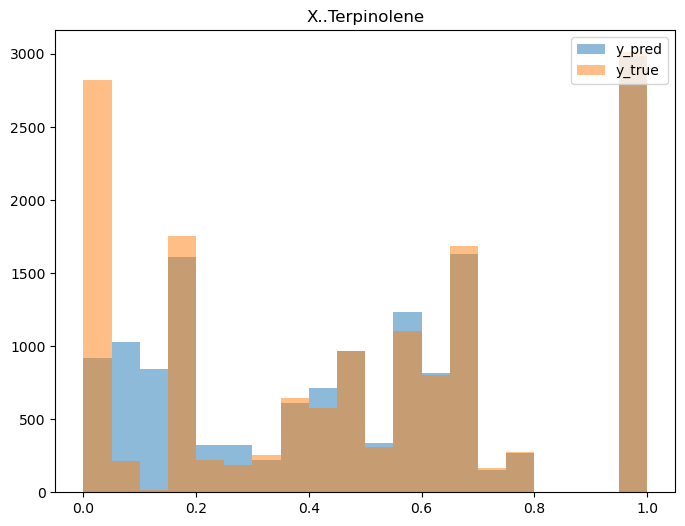

<Figure size 640x480 with 0 Axes>

In [54]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Terpinolene"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_rf_lsa_elbow_terpi.png')

Pearson R

In [55]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.976
P-value: 0.000


<Axes: >

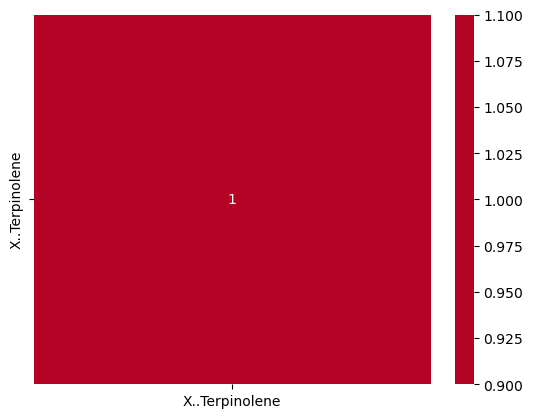

In [56]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)